In [1]:
import numpy as np
import pandas as pd
import sklearn
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('E:/CAP 5610 Machine Learning/titanic/train.csv')
test_df = pd.read_csv('E:/CAP 5610 Machine Learning/titanic/test.csv')
combined = [train_df, test_df]
combinedf = pd.DataFrame(combined)

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
print (train_df.info())
train_df.sample(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S
51,52,0,3,"Nosworthy, Mr. Richard Cater",male,21.0,0,0,A/4. 39886,7.8000,NaN,S
532,533,0,3,"Elias, Mr. Joseph Jr",male,17.0,1,1,2690,7.2292,NaN,C
428,429,0,3,"Flynn, Mr. James",male,NaN,0,0,364851,7.7500,NaN,Q
248,249,1,1,"Beckwith, Mr. Richard Leonard",male,37.0,1,1,11751,52.5542,D35,S
819,820,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.9000,NaN,S
675,676,0,3,"Edvardsson, Mr. Gustaf Hjalmar",male,18.0,0,0,349912,7.7750,NaN,S


In [5]:
train_data_copy = train_df.copy(deep = True)
all_data = pd.DataFrame((train_data_copy, test_df))

In [6]:
print('Training data columns with null values:\n', train_df.isnull().sum())
print("^"*10)

print('Test data columns with null values:\n', test_df.isnull().sum())
print("^"*10)

train_df.describe(include = 'O')

Training data columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
^^^^^^^^^^
Test data columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
^^^^^^^^^^


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [7]:
test_df.describe(include = 'O')

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Duquemin, Mr. Joseph",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [8]:
for df in combined:
    df['Embarked'] = df['Embarked'].fillna(train_df.Embarked.describe().top)

In [9]:
combined[0].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [10]:
train_df[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [11]:
train_df[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


([<matplotlib.axis.XTick at 0x21bbb079470>,
 <a list of 20 Text xticklabel objects>)

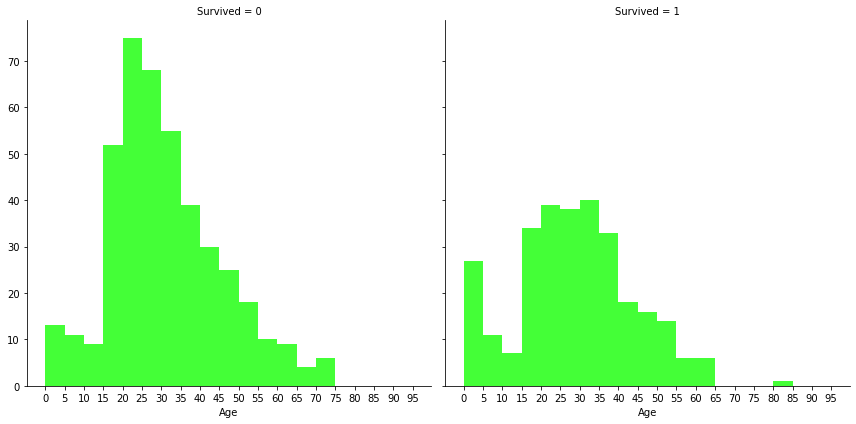

In [12]:
histogram = sns.FacetGrid(train_df, col ='Survived', size=6)
histogram.map(plt.hist, 'Age', bins=range(0, 100, 5), color = '#44FF37')
plt.xticks(range(0, 100, 5))

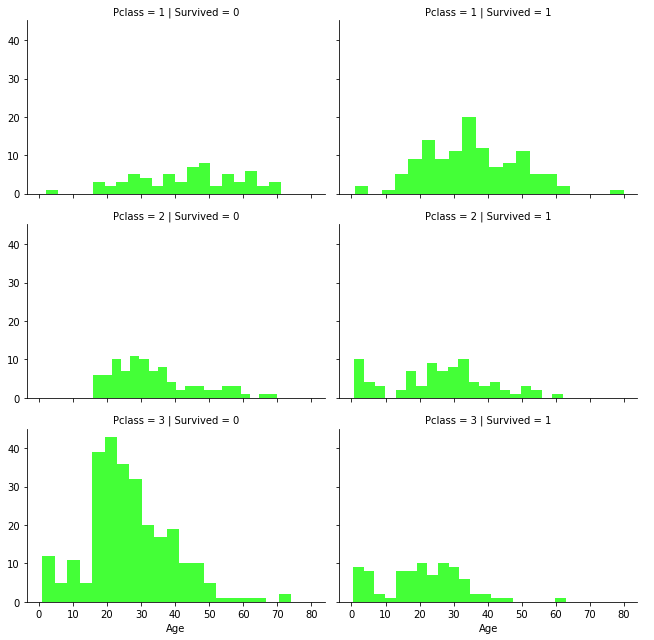

In [13]:
histograms = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=3, aspect=1.5)
histograms.map(plt.hist, 'Age', bins=20, color = '#44FF37')
histograms.add_legend();

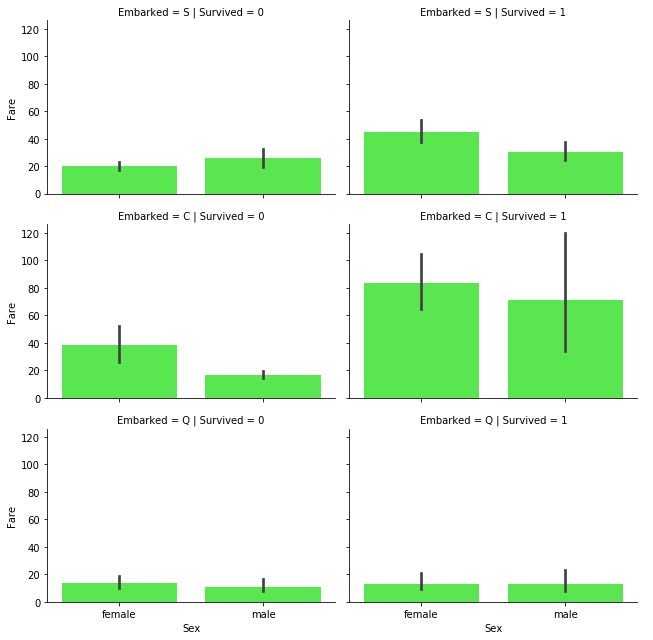

In [14]:
histograms = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=3, aspect=1.5)
histograms.map(sns.barplot, 'Sex', 'Fare', color = '#44FF37')
histograms.add_legend()

In [15]:
train_df['Ticket'].describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

In [16]:
duplicates = ((891-681)/891)*100
print("duplicate rate " + "{:.2f} ".format(duplicates))

duplicate rate 23.57 


In [17]:
cdf = pd.DataFrame(combinedf)
# cdf.describe()
# cdf.describe(include='all')
print('Training data columns with null values:\n', cdf.isnull())

Training data columns with null values:
        0
0  False
1  False


In [18]:
m = {'male' : 0, 'female' : 1}
for d in combined:
    d['Gender'] = df['Sex'].map(m).astype(int)

In [19]:
combined[0].head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1.0


Question 17

In [20]:
import warnings
warnings.filterwarnings('ignore')

for d in combined:
    for i in range (0, len(d)):
        if np.isnan(d["Age"][i]) == True:
            d["Age"][i] = np.random.uniform(low = d['Age'].std(), high = d['Age'].median())

In [21]:
combined[1].tail(7)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.000000,1,0,19928,90.0000,C78,Q,1
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.000000,0,0,347086,7.7750,NaN,S,1
413,1305,3,"Spector, Mr. Woolf",male,15.136034,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,21.872437,0,0,359309,8.0500,NaN,S,0
417,1309,3,"Peter, Master. Michael J",male,16.110547,1,1,2668,22.3583,NaN,C,0


Question 18

In [23]:
for d in combined:
    d['Embarked'] = d['Embarked'].fillna(train_df.Embarked.describe().top)

In [24]:
cdf2 = pd.DataFrame(combined)
print('Training data columns with null values:\n', cdf2.isnull().sum())

Training data columns with null values:
 0    0
dtype: int64


Question 19

In [25]:
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].dropna().mode()[0])
combined[1]['Fare'] = combined[1]['Fare'].fillna(combined[1]['Fare'].dropna().mode()[0])

In [26]:
combined[1].tail(7)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.000000,1,0,19928,90.0000,C78,Q,1
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.000000,0,0,347086,7.7750,NaN,S,1
413,1305,3,"Spector, Mr. Woolf",male,15.136034,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,21.872437,0,0,359309,8.0500,NaN,S,0
417,1309,3,"Peter, Master. Michael J",male,16.110547,1,1,2668,22.3583,NaN,C,0


Question 20

In [27]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand']).mean()
val = train_df.FareBand.unique().get_values()
val.sort()
for d in combined:
    for i in range(len(val)):
        d.loc[(d['Fare'] > val[i].left) & (d['Fare'] <= val[i].right), 'Fare'] = i
    d['Fare'] = d['Fare'].astype(int)

In [28]:
combined[0].tail(7)
# random.sample(combined, k = 10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,FareBand
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,0,NaN,S,NaN,"(-0.001, 7.91]"
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,2,NaN,Q,NaN,"(14.454, 31.0]"
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,1,NaN,S,NaN,"(7.91, 14.454]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,2,B42,S,NaN,"(14.454, 31.0]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23.175137,1,2,W./C. 6607,2,NaN,S,NaN,"(14.454, 31.0]"
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,2,C148,C,NaN,"(14.454, 31.0]"
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,0,NaN,Q,NaN,"(-0.001, 7.91]"
